# Exploring Model Complexity, Bias-Variance Trade-off, and Support Vector Machines


# Bias-Variance Trade-Off with Linear and Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.15, size=X.shape)

X = X.reshape(-1, 1)

# Step 2: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train models of increasing complexity
degrees = [1, 3, 9]
train_errors = []
test_errors = []

plt.figure(figsize=(18, 5))

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Plotting
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='green', label='Test')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {d}')
    plt.title(f"Degree {d} Fit")
    plt.legend()

plt.suptitle("Underfitting vs Overfitting", fontsize=16)
plt.show()

# Plot Train vs Test Error
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()


# VC-Dimension and Model Complexity with Decision Trees


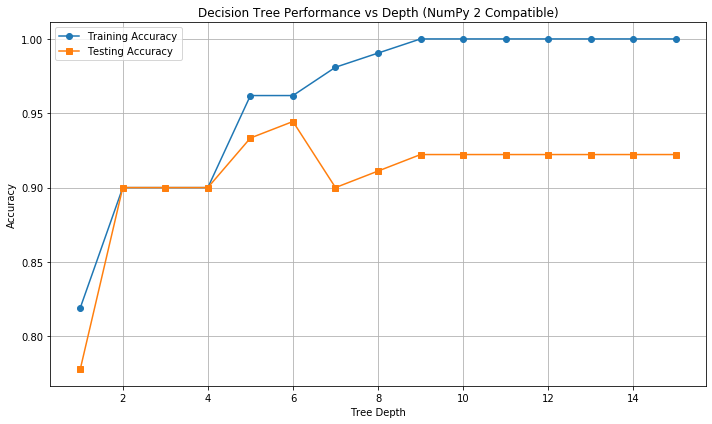

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate a simple non-linear 2D dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Make sure X is a NumPy array in shape (n_samples, n_features)
X = np.asarray(X)
y = np.asarray(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Track performance
train_accuracies = []
test_accuracies = []
depths = range(1, 16)

# Loop through different tree depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Accuracy
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(depths, test_accuracies, label="Testing Accuracy", marker="s")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Performance vs Depth (NumPy 2 Compatible)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# SVM Kernel Exploration and Decision Boundary Visualization



### Blob dataset ###


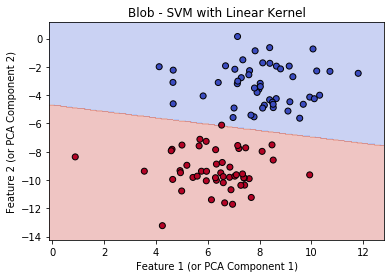

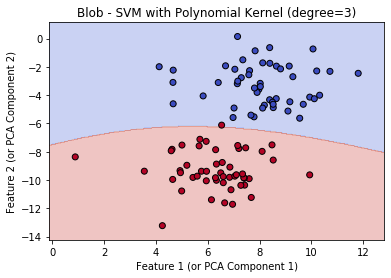

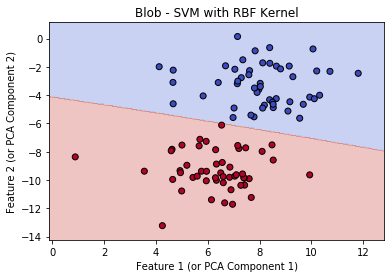


### Iris dataset (Setosa vs Versicolor) ###


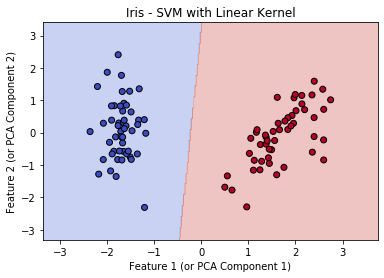

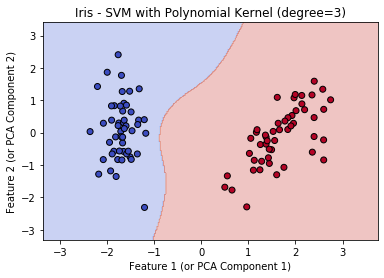

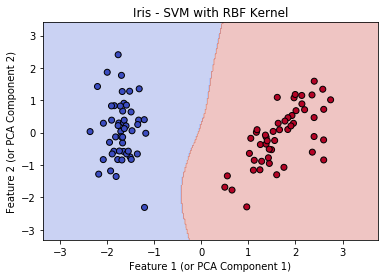

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_decision_boundary(model, X, y, title):
    """
    Plot decision boundary for SVM model with data X and labels y.
    Supports 2D data or data reduced to 2D using PCA.
    """
    # If data has more than 2 features, reduce to 2D for plotting
    if X.shape[1] > 2:
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X)
    else:
        X_2d = X

    # Define grid to evaluate model
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict on grid points
    if X.shape[1] > 2:
        # If PCA was used, inverse transform grid points to original feature space before prediction
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        mesh_original = pca.inverse_transform(mesh_points)
        Z = model.predict(mesh_original)
    else:
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = model.predict(mesh_points)

    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1 (or PCA Component 1)')
    plt.ylabel('Feature 2 (or PCA Component 2)')
    plt.show()

# --------- Blob Dataset ---------
print("### Blob dataset ###")
X_blob, y_blob = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Train and plot SVM with Linear Kernel on blobs
svm_linear_blob = SVC(kernel='linear')
svm_linear_blob.fit(X_blob, y_blob)
plot_decision_boundary(svm_linear_blob, X_blob, y_blob, 'Blob - SVM with Linear Kernel')

# Polynomial Kernel on blobs
svm_poly_blob = SVC(kernel='poly', degree=3)
svm_poly_blob.fit(X_blob, y_blob)
plot_decision_boundary(svm_poly_blob, X_blob, y_blob, 'Blob - SVM with Polynomial Kernel (degree=3)')

# RBF Kernel on blobs
svm_rbf_blob = SVC(kernel='rbf', gamma='scale')
svm_rbf_blob.fit(X_blob, y_blob)
plot_decision_boundary(svm_rbf_blob, X_blob, y_blob, 'Blob - SVM with RBF Kernel')

# --------- Iris Dataset (Binary Classification) ---------
print("\n### Iris dataset (Setosa vs Versicolor) ###")
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Select only classes 0 and 1 for binary classification
binary_mask = y_iris != 2
X_iris_bin = X_iris[binary_mask]
y_iris_bin = y_iris[binary_mask]

# Standardize features for better kernel performance
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris_bin)

# Train and plot SVM with Linear Kernel on Iris
svm_linear_iris = SVC(kernel='linear')
svm_linear_iris.fit(X_iris_scaled, y_iris_bin)
plot_decision_boundary(svm_linear_iris, X_iris_scaled, y_iris_bin, 'Iris - SVM with Linear Kernel')

# Polynomial Kernel on Iris
svm_poly_iris = SVC(kernel='poly', degree=3)
svm_poly_iris.fit(X_iris_scaled, y_iris_bin)
plot_decision_boundary(svm_poly_iris, X_iris_scaled, y_iris_bin, 'Iris - SVM with Polynomial Kernel (degree=3)')

# RBF Kernel on Iris
svm_rbf_iris = SVC(kernel='rbf', gamma='scale')
svm_rbf_iris.fit(X_iris_scaled, y_iris_bin)
plot_decision_boundary(svm_rbf_iris, X_iris_scaled, y_iris_bin, 'Iris - SVM with RBF Kernel')


# Dataset (Simple Linearly Separable 2D Data)

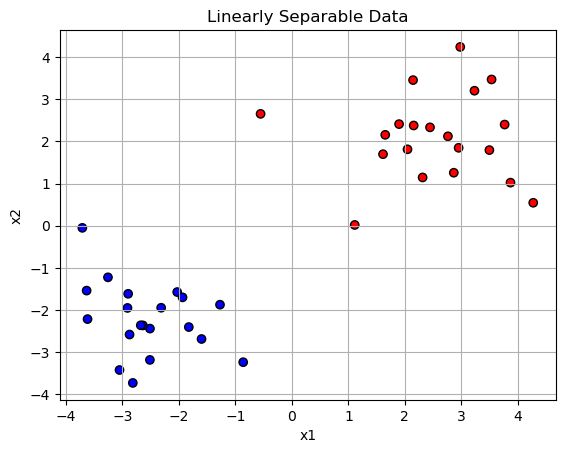

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simple 2D linearly separable data
np.random.seed(0)
X1 = np.random.randn(20, 2) + [2, 2]
X2 = np.random.randn(20, 2) + [-2, -2]
X = np.vstack((X1, X2))
y = np.hstack((np.ones(20), -1 * np.ones(20)))

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Linearly Separable Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

# Linear SVM Implementation (from scratch)

In [7]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

# Training and Evaluation

In [8]:
# Train the custom SVM
svm = LinearSVM()
svm.fit(X, y)
predictions = svm.predict(X)

# Accuracy
acc = np.mean(predictions == y)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 97.50%


# Plot Decision Boundary

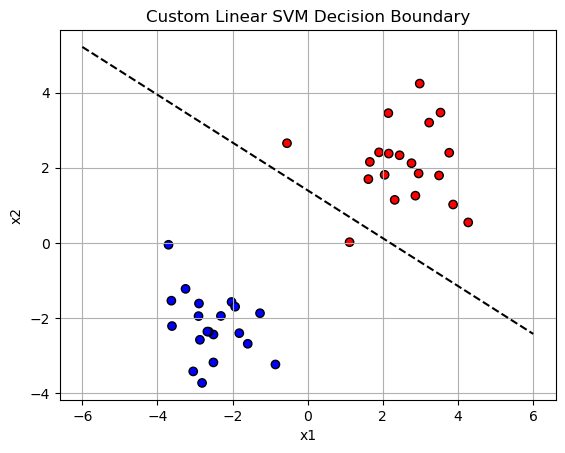

In [9]:
def plot_decision_boundary(X, y, model):
    def get_line(w, b):
        x0 = np.linspace(-6, 6, 100)
        x1 = -(w[0] * x0 + b) / w[1]
        return x0, x1

    x0, x1 = get_line(model.w, model.b)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.plot(x0, x1, 'k--')
    plt.title("Custom Linear SVM Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, svm)


#  New Non-Linearly Separable Dataset

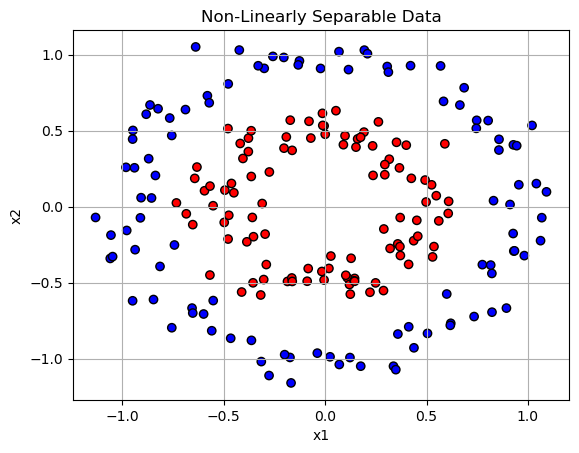

In [10]:
from sklearn.datasets import make_circles

# Create circular data
X, y = make_circles(n_samples=200, noise=0.1, factor=0.5)
y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Non-Linearly Separable Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


# Kernel SVM Implementation (Quadratic Kernel)

In [12]:
class KernelSVM:
    def __init__(self, kernel='poly', degree=2, C=1.0):
        self.kernel = self._polynomial_kernel if kernel == 'poly' else None
        self.degree = degree
        self.C = C

    def _polynomial_kernel(self, X1, X2):
        return (1 + np.dot(X1, X2.T)) ** self.degree

    def fit(self, X, y, epochs=100):
        n_samples = X.shape[0]
        self.X = X
        self.y = y
        self.alpha = np.zeros(n_samples)
        self.b = 0
        self.K = self.kernel(X, X)

        # Simplified SMO-like approach (not optimized)
        for _ in range(epochs):
            for i in range(n_samples):
                condition = y[i] * (np.sum(self.alpha * y * self.K[:, i]) + self.b)
                if condition < 1:
                    self.alpha[i] += self.C
                    self.b += self.C * y[i]

    def project(self, X_test):
        K_test = self.kernel(X_test, self.X)
        return np.dot(K_test, self.alpha * self.y) + self.b

    def predict(self, X_test):
        return np.sign(self.project(X_test))


# Training and Plotting Decision Boundary

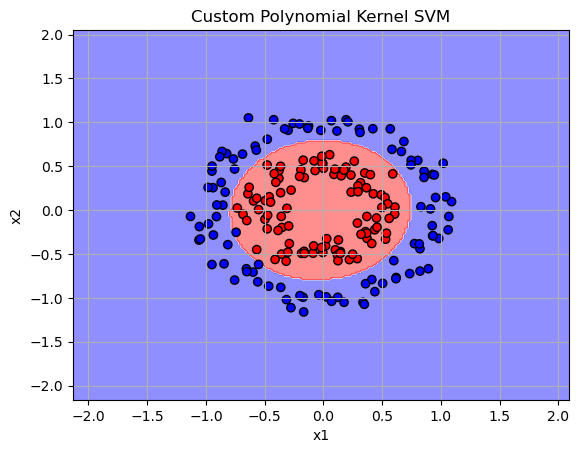

In [13]:
model = KernelSVM(kernel='poly', degree=2, C=0.01)
model.fit(X, y)

def plot_kernel_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    XY = np.c_[XX.ravel(), YY.ravel()]
    Z = model.predict(XY).reshape(XX.shape)

    plt.contourf(XX, YY, Z, alpha=0.5, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title("Custom Polynomial Kernel SVM")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_kernel_decision_boundary(model, X, y)


# Visualize Before/After Kernel Transformation

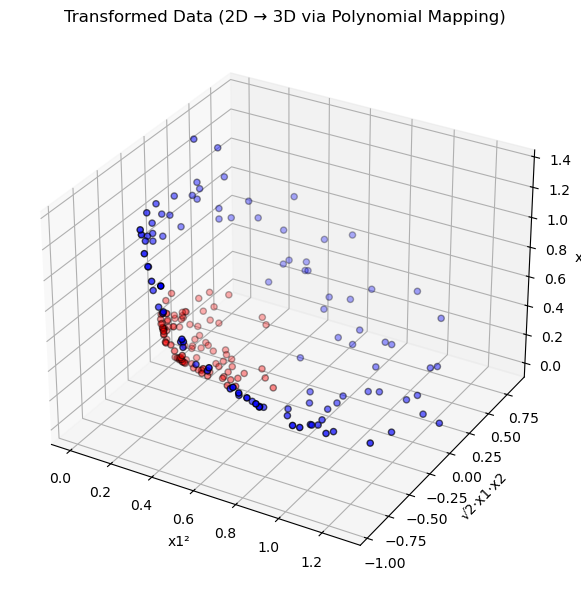

In [14]:
# Apply Explicit Mapping to 3D
from mpl_toolkits.mplot3d import Axes3D

def polynomial_map_2d_to_3d(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.c_[x1**2, np.sqrt(2)*x1*x2, x2**2]

# Transform data
X_3d = polynomial_map_2d_to_3d(X)

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='bwr', edgecolors='k')
ax.set_title("Transformed Data (2D → 3D via Polynomial Mapping)")
ax.set_xlabel("x1²")
ax.set_ylabel("√2·x1·x2")
ax.set_zlabel("x2²")
plt.tight_layout()
plt.show()


# Comparison with scikit-learn's SVM


In [15]:
# Import & Train scikit-learn SVMs
from sklearn.svm import SVC

# Linear Kernel SVM
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X, y)

# Polynomial Kernel SVM (degree=2)
svc_poly = SVC(kernel='poly', degree=2, C=1.0)
svc_poly.fit(X, y)


SVC(degree=2, kernel='poly')

# Plot Decision Boundaries

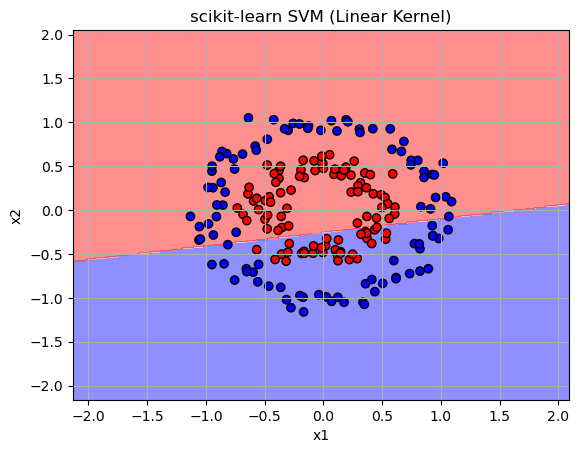

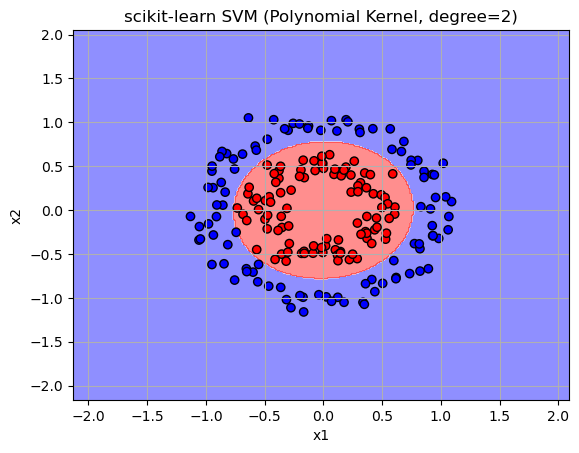

In [16]:
def plot_sklearn_svm(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, Z, cmap='bwr', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

# Plot both
plot_sklearn_svm(svc_linear, X, y, "scikit-learn SVM (Linear Kernel)")
plot_sklearn_svm(svc_poly, X, y, "scikit-learn SVM (Polynomial Kernel, degree=2)")
